## Analysis of pH vs. Depth of the Southern Ocean using SOCCOM Floats

All float data was saved from the following website: https://soccompu.princeton.edu/www/index.html (High res, MLR, NETCDF)
* There are three different formats to download (LIAR, CANYON, MLR) each calculate DIC,pCO2 diffrently

## Imports

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import argopy
import glob
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import pandas as pd
import glob 
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline 

In [4]:
# Creates a path from files saved onto despktop into program
path='/Users/Jocelyne/Desktop/Floats/'
files=glob.glob(path+'*.nc')
files[0]

'/Users/Jocelyne/Desktop/Floats/5904675_HRQC.nc'

In [141]:
# ds opens the dataset of each float called as further into the program this dataset is used to call all float files into a specific Longitudinal Bin 
ds=xr.open_dataset(files[35])
ds

<xarray.Dataset>
Dimensions:              (NPARAMETER: 46, N_LEVELS: 557, N_PROF: 181)
Dimensions without coordinates: NPARAMETER, N_LEVELS, N_PROF
Data variables: (12/66)
    Cruise               |S11 ...
    Station              (N_PROF) int32 ...
    Lon                  (N_PROF) float64 ...
    Lat                  (N_PROF) float64 ...
    Lat_QF               (N_PROF) |S1 ...
    Lat_QFA              (N_PROF) float64 ...
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 ...
    hh_mm                (N_PROF) |S5 ...
    Parameters           (NPARAMETER) |S19 ...
    JULD                 (N_PROF) datetime64[ns] ...
    REFERENCE_DATE_TIME  object ...
Attributes:
    Comments:  \n//0\n//<Encoding>UTF-8</Encoding>\n//File updated on 05/01/2...

In [33]:
Counts=np.empty((len(files)))
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    Counts[i]=len(ds.N_PROF) * len(ds.N_LEVELS)
Counts
np.sum(Counts)

8815590.0

## Longtitdinal Bins of the S.O 

* At every 30 degrees lon, a Longtitdunal bin was created to house the various floats that are in that particular area 

## Bin 1 (0°-30°)

In [137]:
# Empty lists of Bins and the variable needed 
Bin1_Lon=[]
Bin1_Lat=[]
Bin1_pH=[]
Bin1_Depth=[]
Bin1_Time=[]

#This for loop, loops through all files in the dataset 
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        # Places valid floats into bins w/respet to their Lon Bin <-- The dataset for these floats has a range of Lon of (0-360)
        if ds.Lon[ii] >=0 and ds.Lon[ii] <=30:
            for iii in range(0,ds.pHinsitu.shape[1]):
                #Q.C for ph range
                 if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    #Appends into appropiate bin the correct float files
                    Bin1_Lon=np.append(Bin1_Lon,ds.Lon.values[ii])
                    Bin1_Lat=np.append(Bin1_Lat,ds.Lat.values[ii])
                    Bin1_pH=np.append(Bin1_pH,ds.pHinsitu.values[ii,iii])
                    Bin1_Depth=np.append(Bin1_Depth,ds.Depth.values[ii,iii])
                    Bin1_Time=np.append(Bin1_Time,ds.mon_day_yr.values[ii])

<ipython-input-139-cd58fb722e42>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


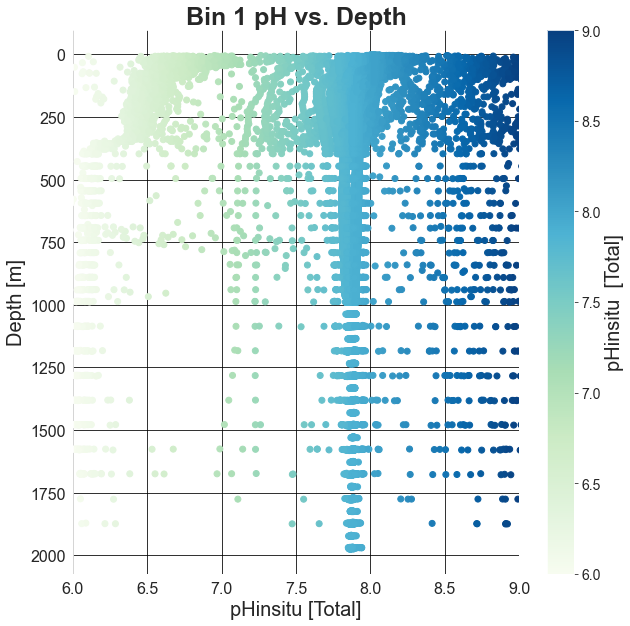

In [139]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes,Title font sizes
plt.rc('axes', labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Plot
plt.scatter(Bin1_pH,Bin1_Depth, c=Bin1_pH, cmap='GnBu')
ax=plt.axes()
plt.title('Bin 1 pH vs. Depth',fontweight="bold")
plt.xlim(6,9) #<-- Limits range of pH shown on x-axis
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()#<-- Inverts y-axis
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinsitu  [Total]')
plt.clim(6,9) #<-- limits colorbar range
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 1 pH vs. Depth.pdf')

## Bin 2 (30°-60°)

In [5]:
# Empty lists of Bins and the variable needed 
Bin2_Lon=[]
Bin2_Lat=[]
Bin2_pH=[]
Bin2_Depth=[]
Bin2_Time=[]

#This for loop, loops through all files in the dataset 
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=30 and ds.Lon[ii] <=60:
            for iii in range(0,ds.pHinsitu.shape[1]):
                if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin2_Lon=np.append(Bin2_Lon,ds.Lon.values[ii])
                    Bin2_Lat=np.append(Bin2_Lat,ds.Lat.values[ii])
                    Bin2_pH=np.append(Bin2_pH,ds.pHinsitu.values[ii,iii])
                    Bin2_Depth=np.append(Bin2_Depth,ds.Depth.values[ii,iii])
                    Bin2_Time=np.append(Bin2_Time,ds.mon_day_yr.values[ii])

<ipython-input-22-c691780877d1>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


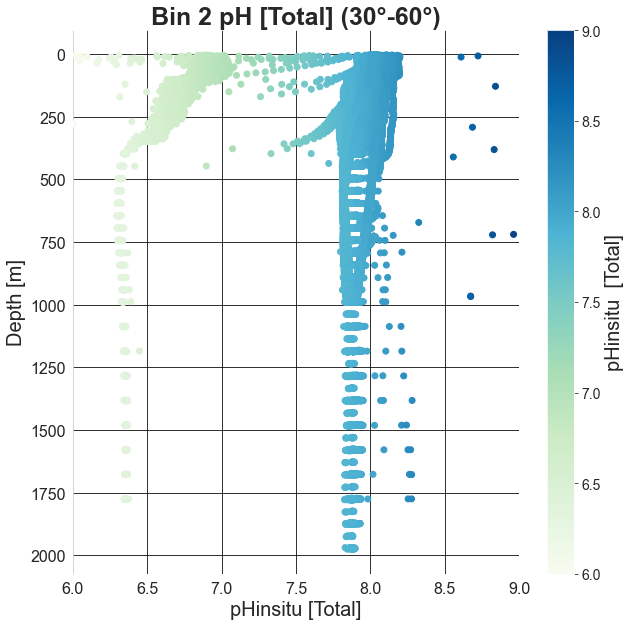

In [22]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Plot
plt.scatter(Bin2_pH,Bin2_Depth, c=Bin2_pH, cmap='GnBu')
ax=plt.axes()
plt.title('Bin 2 pH [Total] (30°-60°)',fontweight="bold")
plt.xlim(6,9)
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinsitu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 2 pH vs. Depth (30-60).pdf', dpi=600)

## Bin 3 (60°-90°)

In [50]:
Bin3_Lon=[]
Bin3_Lat=[]
Bin3_pH=[]
Bin3_Depth=[]
Bin3_Time=[]
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=60 and ds.Lon[ii] <=90:
            for iii in range(0,ds.pHinsitu.shape[1]):
                 if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin3_Lon=np.append(Bin3_Lon,ds.Lon.values[ii])
                    Bin3_Lat=np.append(Bin3_Lat,ds.Lat.values[ii])
                    Bin3_pH=np.append(Bin3_pH,ds.pHinsitu.values[ii,iii])
                    Bin3_Depth=np.append(Bin3_Depth,ds.Depth.values[ii,iii])
                    Bin3_Time=np.append(Bin3_Time,ds.mon_day_yr.values[ii])

<ipython-input-134-a0185e3bfb35>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


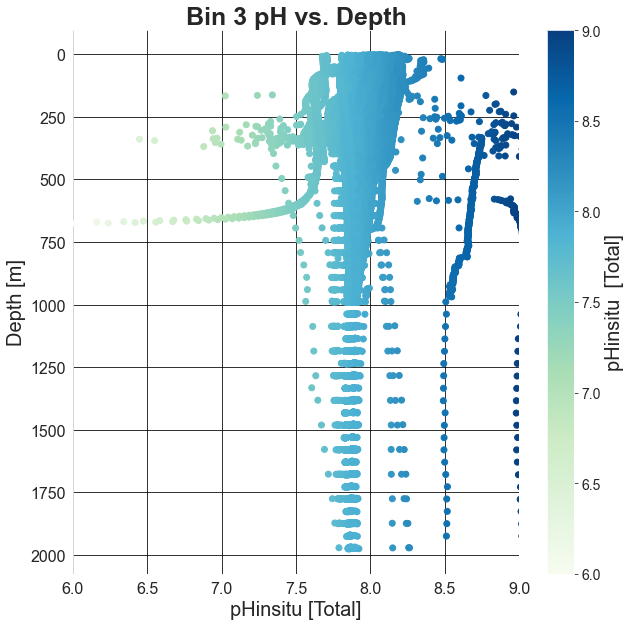

In [134]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Plot
plt.scatter(Bin3_pH,Bin3_Depth, c=Bin3_pH, cmap='GnBu')
ax=plt.axes()
plt.title('Bin 3 pH vs. Depth',fontweight="bold")
plt.xlim(6,9)
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinsitu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin3 pH vs. Depth.pdf')

## Bin 4 (90°-120°)

In [8]:
Bin4_Lon=[]
Bin4_Lat=[]
Bin4_pH=[]
Bin4_Depth=[]
Bin4_Time=[]
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=90 and ds.Lon[ii] <=120:
            for iii in range(0,ds.pHinsitu.shape[1]):
                if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin4_Lon=np.append(Bin4_Lon,ds.Lon.values[ii])
                    Bin4_Lat=np.append(Bin4_Lat,ds.Lat.values[ii])
                    Bin4_pH=np.append(Bin4_pH,ds.pHinsitu.values[ii,iii])
                    Bin4_Depth=np.append(Bin4_Depth,ds.Depth.values[ii,iii])
                    Bin4_Time=np.append(Bin4_Time,ds.mon_day_yr.values[ii])

<ipython-input-23-cb5604f56ed9>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


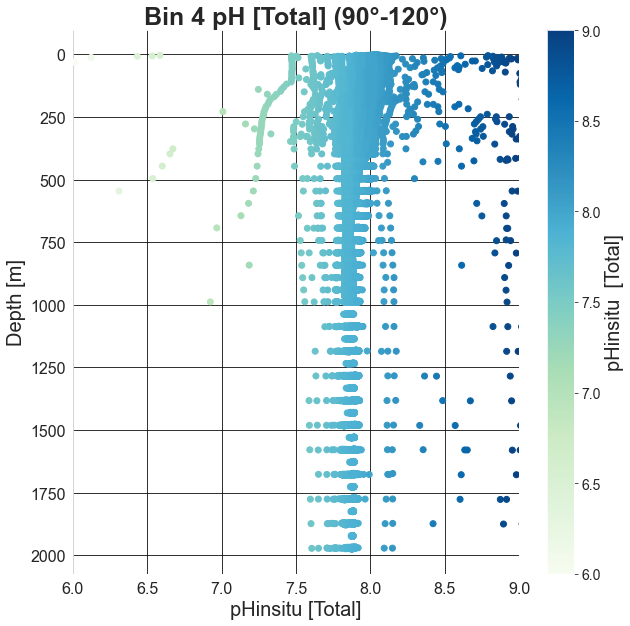

In [23]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Plot
plt.scatter(Bin4_pH,Bin4_Depth,c=Bin4_pH, cmap='GnBu')
ax=plt.axes()
plt.title('Bin 4 pH [Total] (90°-120°)',fontweight="bold")
plt.xlim(6,9)
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinsitu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 4 pH vs. Depth (90-120).pdf', dpi=600)

## Bin 5 (120°-150°)

In [93]:
Bin5_Lon=[]
Bin5_Lat=[]
Bin5_pH=[]
Bin5_Depth=[]
Bin5_Time=[]
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=120 and ds.Lon[ii] <=150:
            for iii in range(0,ds.pHinsitu.shape[1]):
                if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin5_Lon=np.append(Bin5_Lon,ds.Lon.values[ii])
                    Bin5_Lat=np.append(Bin5_Lat,ds.Lat.values[ii])
                    Bin5_pH=np.append(Bin5_pH,ds.pHinsitu.values[ii,iii])
                    Bin5_Depth=np.append(Bin5_Depth,ds.Depth.values[ii,iii])
                    Bin5_Time=np.append(Bin5_Time,ds.mon_day_yr.values[ii])
                   

<ipython-input-132-d14f7e816e6f>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


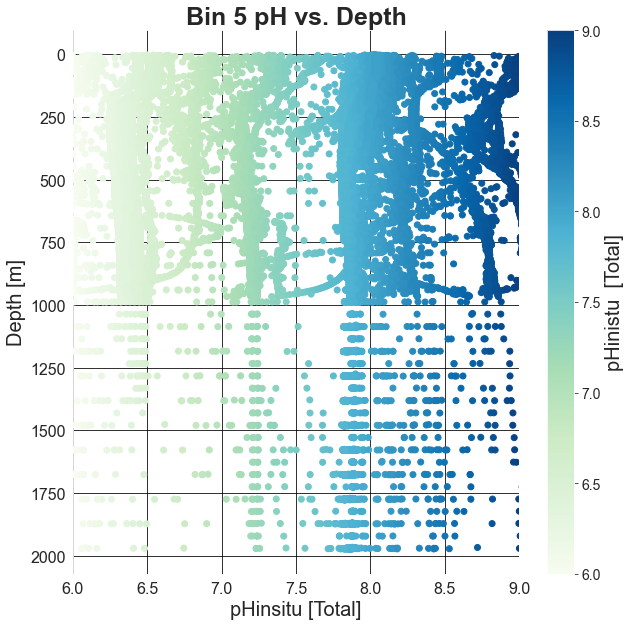

In [132]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Plot
plt.scatter(Bin5_pH,Bin5_Depth,c=Bin5_pH, cmap='GnBu')
ax=plt.axes()
plt.title('Bin 5 pH vs. Depth',fontweight="bold")
plt.xlim(6,9)
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinistu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 5 pH vs. Depth.pdf')

## Bin 6 (150°-180°)

In [10]:
Bin6_Lon=[]
Bin6_Lat=[]
Bin6_pH=[]
Bin6_Depth=[]
Bin6_Time=[]
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=150 and ds.Lon[ii] <=180:
            for iii in range(0,ds.pHinsitu.shape[1]):
                if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin6_Lon=np.append(Bin6_Lon,ds.Lon.values[ii])
                    Bin6_Lat=np.append(Bin6_Lat,ds.Lat.values[ii])
                    Bin6_pH=np.append(Bin6_pH,ds.pHinsitu.values[ii,iii])
                    Bin6_Depth=np.append(Bin6_Depth,ds.Depth.values[ii,iii])
                    Bin6_Time=np.append(Bin6_Time,ds.mon_day_yr.values[ii])

<ipython-input-24-a17c11d87dce>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


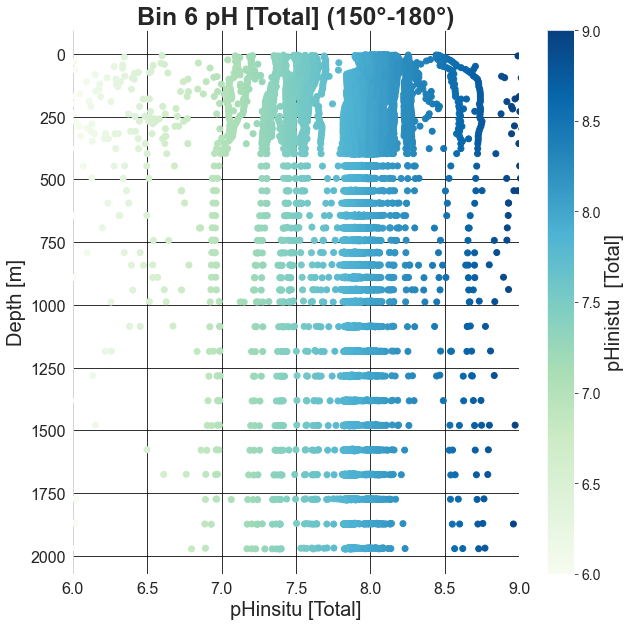

In [24]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Plot
plt.scatter(Bin6_pH,Bin6_Depth,c=Bin6_pH, cmap='GnBu')
ax=plt.axes()
plt.title('Bin 6 pH [Total] (150°-180°)',fontweight="bold")
plt.xlim(6,9)
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinistu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 6 pH vs. Depth 150-180.pdf', dpi=600)

## Bin 7 (180°-210°)

In [14]:
Bin7_Lon=[]
Bin7_Lat=[]
Bin7_pH=[]
Bin7_Depth=[]
Bin7_Time=[]
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=180 and ds.Lon[ii] <=210:
            for iii in range(0,ds.pHinsitu.shape[1]):
                if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin7_Lon=np.append(Bin7_Lon,ds.Lon.values[ii])
                    Bin7_Lat=np.append(Bin7_Lat,ds.Lat.values[ii])
                    Bin7_pH=np.append(Bin7_pH,ds.pHinsitu.values[ii,iii])
                    Bin7_Depth=np.append(Bin7_Depth,ds.Depth.values[ii,iii])
                    Bin7_Time=np.append(Bin7_Time,ds.mon_day_yr.values[ii])

<ipython-input-129-4416701be7ea>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


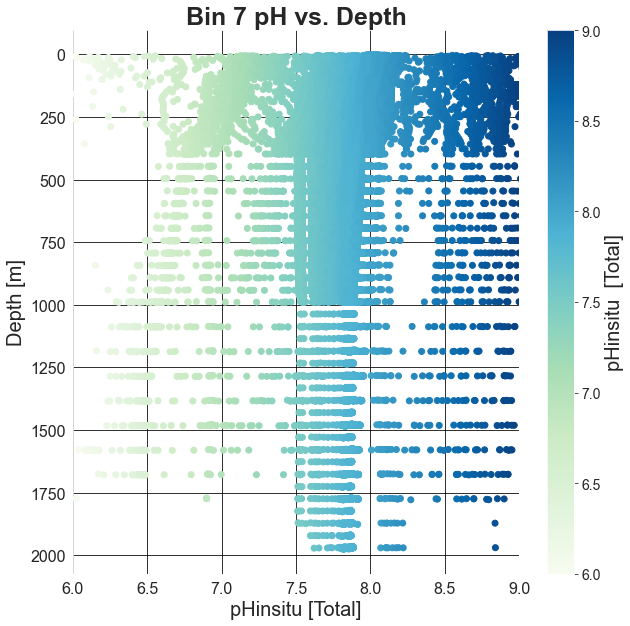

In [129]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes', labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Plot
plt.scatter(Bin7_pH,Bin7_Depth,c=Bin7_pH, cmap='GnBu')
ax=plt.axes()
plt.title('Bin 7 pH vs. Depth',fontweight="bold")
plt.xlim(6,9)
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinsitu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 7 pH vs. Depth.pdf')

## Bin 8 (210°-240°)

In [14]:
Bin8_Lon=[]
Bin8_Lat=[]
Bin8_pH=[]
Bin8_Depth=[]
Bin8_Time=[]
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=210 and ds.Lon[ii] <=240:
            for iii in range(0,ds.pHinsitu.shape[1]):
                 if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin8_Lon=np.append(Bin8_Lon,ds.Lon.values[ii])
                    Bin8_Lat=np.append(Bin8_Lat,ds.Lat.values[ii])
                    Bin8_pH=np.append(Bin8_pH,ds.pHinsitu.values[ii,iii])
                    Bin8_Depth=np.append(Bin8_Depth,ds.Depth.values[ii,iii])
                    Bin8_Time=np.append(Bin8_Time,ds.mon_day_yr.values[ii])

<ipython-input-25-4921618ba3a0>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


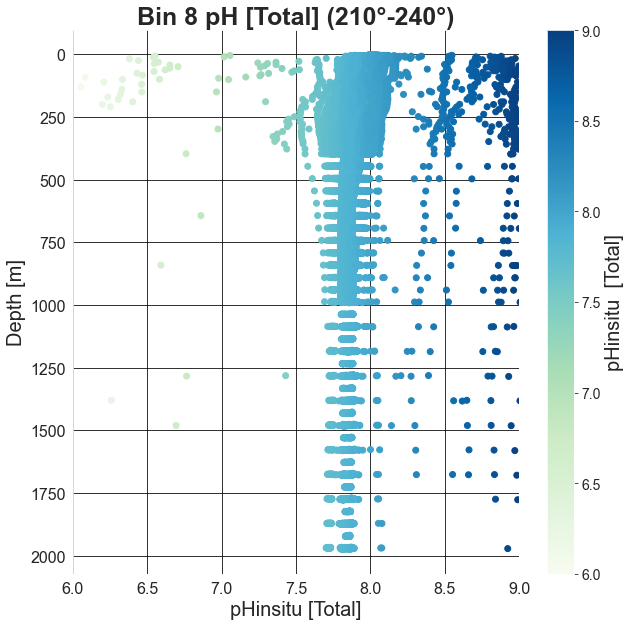

In [25]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes', labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Plot
plt.scatter(Bin8_pH,Bin8_Depth,c=Bin8_pH, cmap='GnBu')
ax=plt.axes()
plt.title('Bin 8 pH [Total] (210°-240°)',fontweight="bold")
plt.xlim(6,9)
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinsitu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 8 pH vs. Depth (210-240).pdf', dpi=600)

## Bin 9 (240°-270°)

In [69]:
Bin9_Lon=[]
Bin9_Lat=[]
Bin9_pH=[]
Bin9_Depth=[]
Bin9_Time=[]
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=240 and ds.Lon[ii] <=270:
            for iii in range(0,ds.pHinsitu.shape[1]):
                if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin9_Lon=np.append(Bin9_Lon,ds.Lon.values[ii])
                    Bin9_Lat=np.append(Bin9_Lat,ds.Lat.values[ii])
                    Bin9_pH=np.append(Bin9_pH,ds.pHinsitu.values[ii,iii])
                    Bin9_Depth=np.append(Bin9_Depth,ds.Depth.values[ii,iii])
                    Bin9_Time=np.append(Bin9_Time,ds.mon_day_yr.values[ii])

<ipython-input-127-4d1eaff958e4>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


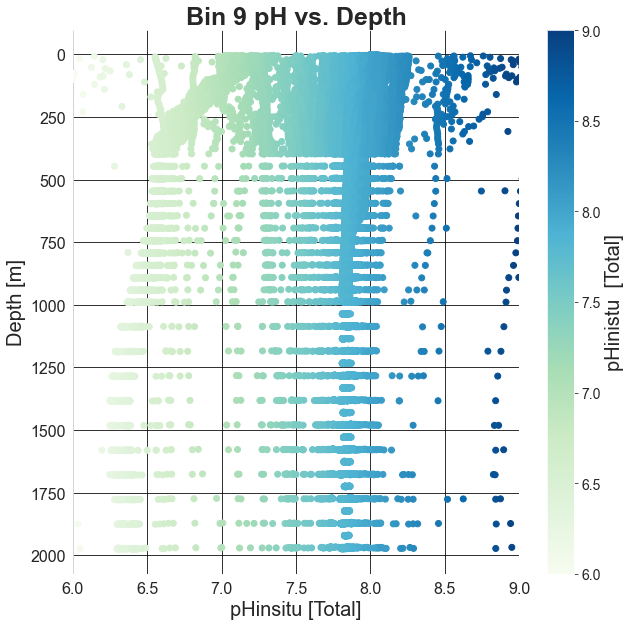

In [127]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes', labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#Plot
plt.scatter(Bin9_pH,Bin9_Depth,c=Bin9_pH, cmap='GnBu')
ax=plt.axes()
plt.title('Bin 9 pH vs. Depth',fontweight="bold")
plt.xlim(6,9)
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinistu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 9 pH vs. Depth.pdf')

## Bin 10 (270°-300°)

In [17]:
Bin10_Lon=[]
Bin10_Lat=[]
Bin10_pH=[]
Bin10_Depth=[]
Bin10_Time=[]
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=270 and ds.Lon[ii] <=300:
            for iii in range(0,ds.pHinsitu.shape[1]):
                if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin10_Lon=np.append(Bin10_Lon,ds.Lon.values[ii])
                    Bin10_Lat=np.append(Bin10_Lat,ds.Lat.values[ii])
                    Bin10_pH=np.append(Bin10_pH,ds.pHinsitu.values[ii,iii])
                    Bin10_Depth=np.append(Bin10_Depth,ds.Depth.values[ii,iii])
                    Bin10_Time=np.append(Bin10_Time,ds.mon_day_yr.values[ii])

<ipython-input-26-2492b4923627>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


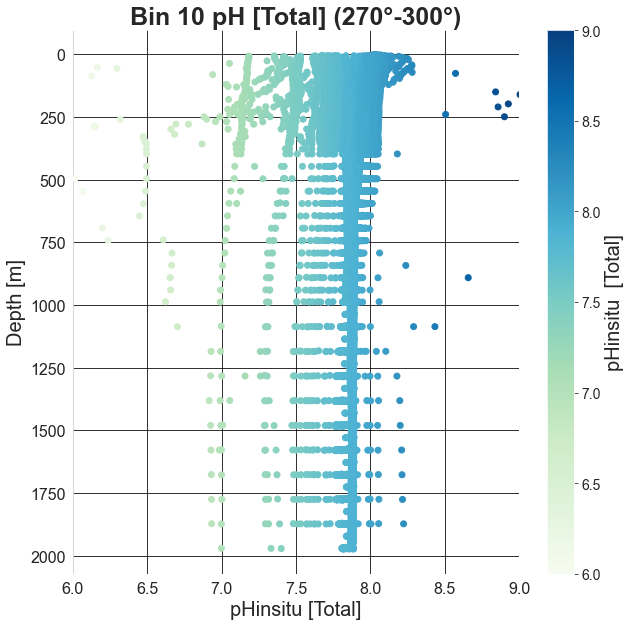

In [26]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes', labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar.ax.tick_params(labelsize=16)

#Plot
plt.scatter(Bin10_pH,Bin10_Depth, c=Bin10_pH, cmap='GnBu')
ax=plt.axes()
plt.xlim(6,9)
plt.title('Bin 10 pH [Total] (270°-300°)',fontweight="bold")
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinsitu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 10 pH vs. Depth (270-300).pdf', dpi=600)

## Bin 11 (300°-330°)

In [124]:
Bin11_Lon=[]
Bin11_Lat=[]
Bin11_pH=[]
Bin11_Depth=[]
Bin11_Time=[]
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=300 and ds.Lon[ii] <=330:
            for iii in range(0,ds.pHinsitu.shape[1]):
                 if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin11_Lon=np.append(Bin11_Lon,ds.Lon.values[ii])
                    Bin11_Lat=np.append(Bin11_Lat,ds.Lat.values[ii])
                    Bin11_pH=np.append(Bin11_pH,ds.pHinsitu.values[ii,iii])
                    Bin11_Depth=np.append(Bin11_Depth,ds.Depth.values[ii,iii])
                    Bin11_Time=np.append(Bin11_Time,ds.mon_day_yr.values[ii])

<ipython-input-118-8482f0c67e47>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


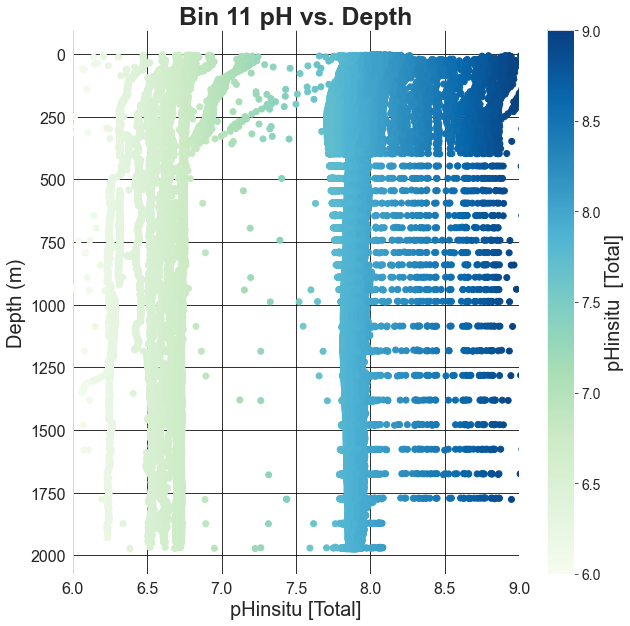

In [118]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar.ax.tick_params(labelsize=16)

#Plot
plt.scatter(Bin11_pH,Bin11_Depth,c=Bin11_pH, cmap='GnBu')
ax=plt.axes()
plt.xlim(6,9)
plt.title('Bin 11 pH vs. Depth',fontweight="bold")
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinsitu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 11 pH vs. Depth.pdf')

## Bin 12 (330°-360°)

In [19]:
Bin12_Lon=[]
Bin12_Lat=[]
Bin12_pH=[]
Bin12_Depth=[]
Bin12_Time=[]
for i in range(0,len(files)):
    ds=xr.open_dataset(files[i])
    for ii in range (0,len(ds.Lon)):
        if ds.Lon[ii] >=330 and ds.Lon[ii] <=360:
            for iii in range(0,ds.pHinsitu.shape[1]):
                 if ds.pHinsitu.values[ii,iii] >=0 and ds.pHinsitu.values[ii,iii] <=14:
                    Bin12_Lon=np.append(Bin12_Lon,ds.Lon.values[ii])
                    Bin12_Lat=np.append(Bin12_Lat,ds.Lat.values[ii])
                    Bin12_pH=np.append(Bin12_pH,ds.pHinsitu.values[ii,iii])
                    Bin12_Depth=np.append(Bin12_Depth,ds.Depth.values[ii,iii])
                    Bin12_Time=np.append(Bin12_Time,ds.mon_day_yr.values[ii])

<ipython-input-27-c90fe467e8f3>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


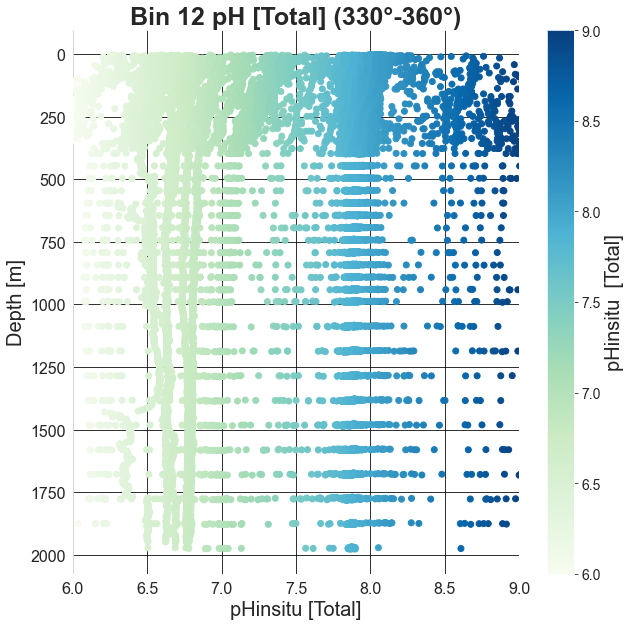

In [27]:
#Fig Size
fig=plt.figure(figsize=(10,10))

#Axes, Title font sizes
plt.rc('axes', labelsize=20)
plt.rc('axes',titlesize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar.ax.tick_params(labelsize=16)

#Plot
plt.scatter(Bin12_pH,Bin12_Depth, c=Bin12_pH, cmap='GnBu')
ax=plt.axes()
plt.xlim(6,9)
plt.title('Bin 12 pH [Total] (330°-360°)',fontweight="bold")
plt.xlabel('pHinsitu [Total]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.grid(color='black')

#Plot background Color
ax.set_facecolor("white")

#Colorbar
cbar=plt.colorbar();
cbar.set_label('pHinsitu  [Total]')
plt.clim(6,9)
cbar.ax.tick_params(labelsize=14)

#Save figure
plt.savefig('Bin 12 pH vs. Depth (330-360).pdf', dpi=600)

## Total

In [104]:
total_Lon=np.concatenate((Bin1_Lon,Bin2_Lon,Bin3_Lon,Bin4_Lon,Bin5_Lon,Bin6_Lon,Bin7_Lon,Bin8_Lon,Bin9_Lon,Bin10_Lon,Bin11_Lon,Bin12_Lon),axis=None)
total_Lat=np.concatenate((Bin1_Lat,Bin2_Lat,Bin3_Lat,Bin4_Lat,Bin5_Lat,Bin6_Lat,Bin7_Lat,Bin8_Lat,Bin9_Lat,Bin10_Lat,Bin11_Lat,Bin12_Lat),axis=None)
total_pH=np.concatenate((Bin1_pH,Bin2_pH,Bin3_pH,Bin4_pH,Bin5_pH,Bin6_pH,Bin7_pH,Bin8_pH,Bin9_pH,Bin10_pH,Bin11_pH,Bin12_pH),axis=None)
total_Depth=np.concatenate((Bin1_Depth,Bin2_Depth,Bin3_Depth,Bin4_Depth,Bin5_Depth,Bin6_Depth,Bin7_Depth,Bin8_Depth,Bin9_Depth,Bin10_Depth,Bin11_Depth,Bin12_Depth),axis=None)
total_Time=np.concatenate((Bin1_Time,Bin2_Time,Bin3_Time,Bin4_Time,Bin5_Time,Bin6_Time,Bin7_Time,Bin8_Time,Bin9_Time,Bin10_Time,Bin11_Time,Bin12_Time),axis=None)

In [75]:
surface_ind=np.where(Bin12_Depth <=100)
surface_Depth=Bin12_Depth[surface_ind]
surface_pH=Bin12_pH[surface_ind]

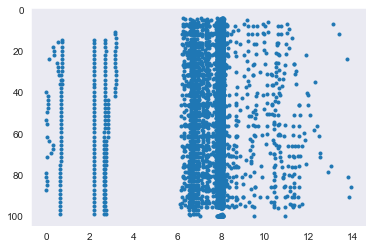

In [25]:
plt.plot(surface_pH,surface_Depth,".")
plt.gca().invert_yaxis()